In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv("/content/drive/MyDrive/CNN_PRACTICE/fer2013.csv")

In [7]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [9]:
df.drop('Usage',axis=1,inplace=True)

In [10]:
df.shape

(35887, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [12]:
def getData(filename): 
    Y = [] 
    X = [] 
    first = True
    for line in open(filename):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X)/255.0,np.array(Y) 
    return X, Y

In [13]:
filename="/content/drive/MyDrive/CNN_PRACTICE/fer2013.csv"
X,Y=getData(filename)
num_class = len(set(Y))
print(num_class)

7


In [14]:
X.shape

(35887, 2304)

In [15]:
N=35887

In [16]:
X=X.reshape(N,48,48,1)

In [17]:
X.shape

(35887, 48, 48, 1)

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [19]:
Y_train=tf.keras.utils.to_categorical(Y_train,7) 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization

In [21]:
model=Sequential()
model.add(Conv2D(64,(5,5),input_shape=(X.shape[1:]),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
          
model.add(Conv2D(128,(5,5),input_shape=(X.shape[1:]),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
          
model.add(Conv2D(256,(5,5),input_shape=(X.shape[1:]),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
          
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
      
model.add(Dropout(0.25))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
trained_model=model.fit(X_train,Y_train,batch_size=32,epochs=10)

Epoch 1/10
1010/1010 [==============================] - 1122s 1s/step - loss: 1.6784 - accuracy: 0.3549
Epoch 2/10
1010/1010 [==============================] - 1124s 1s/step - loss: 1.2432 - accuracy: 0.5240
Epoch 3/10
1010/1010 [==============================] - 1125s 1s/step - loss: 1.1000 - accuracy: 0.5841
Epoch 4/10
1010/1010 [==============================] - 1126s 1s/step - loss: 0.9715 - accuracy: 0.6400
Epoch 5/10
1010/1010 [==============================] - 1122s 1s/step - loss: 0.8392 - accuracy: 0.6942
Epoch 6/10
1010/1010 [==============================] - 1128s 1s/step - loss: 0.6789 - accuracy: 0.7540
Epoch 7/10
1010/1010 [==============================] - 1119s 1s/step - loss: 0.4941 - accuracy: 0.8268
Epoch 8/10
1010/1010 [==============================] - 1124s 1s/step - loss: 0.3595 - accuracy: 0.8774
Epoch 9/10
1010/1010 [==============================] - 1118s 1s/step - loss: 0.2546 - accuracy: 0.9155
Epoch 10/10
1010/1010 [==============================] - 1118s 1

In [24]:
Y_pred=model.predict(X_test)

In [25]:
Y_pred=Y_pred.argmax(axis=1)

In [26]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.40      0.47       484
           1       0.67      0.57      0.62        56
           2       0.44      0.45      0.45       502
           3       0.82      0.71      0.76       920
           4       0.48      0.48      0.48       599
           5       0.75      0.74      0.74       442
           6       0.44      0.64      0.52       586

    accuracy                           0.58      3589
   macro avg       0.59      0.57      0.58      3589
weighted avg       0.60      0.58      0.59      3589



In [27]:
model.save('model_filter31_1.h5')

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import load_model

In [2]:
model = load_model('model_filter31_1.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [5]:
from skimage import io

In [10]:
import matplotlib.image as mpimg

In [ ]:
#1

In [8]:
img = image.load_img('download.jpg',grayscale=True,target_size=(48,48))
x = image.img_to_array(img) 
x = np.expand_dims(x, axis = 0) 
x /= 255

In [9]:
custom = model.predict(x)

2
fear


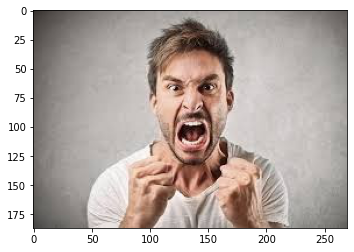

In [13]:
Y_pred=custom.argmax(axis=1)
print(int(Y_pred))
o=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
s=int(Y_pred)
print(o[s])
img=mpimg.imread('download.jpg')
plt.imshow(img)

In [ ]:
#2

5
surprise


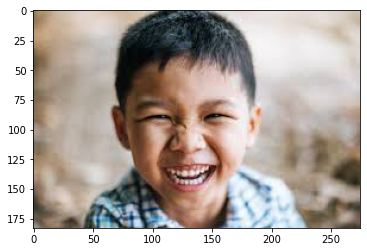

In [14]:
img = image.load_img('images.jpg',grayscale=True,target_size=(48,48))
x = image.img_to_array(img) 
x = np.expand_dims(x, axis = 0) 
x /= 255

custom = model.predict(x)

Y_pred=custom.argmax(axis=1)
print(int(Y_pred))
o=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
s=int(Y_pred)
print(o[s])
img=mpimg.imread('images.jpg')
plt.imshow(img)

In [ ]:
#3

4
sad


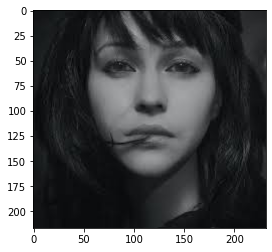

In [15]:
img = image.load_img('download1.jpg',grayscale=True,target_size=(48,48))
x = image.img_to_array(img) 
x = np.expand_dims(x, axis = 0) 
x /= 255

custom = model.predict(x)

Y_pred=custom.argmax(axis=1)
print(int(Y_pred))
o=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
s=int(Y_pred)
print(o[s])
img=mpimg.imread('download1.jpg')
plt.imshow(img)